In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from scipy import linalg
from IPython.display import Image
from IPython.display import display

from math import ceil
import numpy as np
from scipy import linalg

# KDE

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [6]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

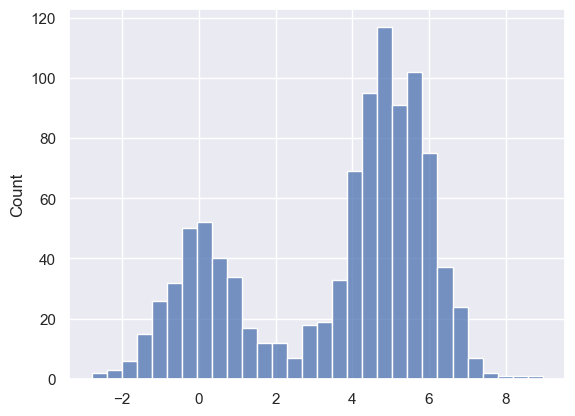

In [8]:
hist = sns.histplot(data=x, bins=30, kde=False)

Посмотрим на гистограммы с заданными границами бинов. Это можно сделать, создав массив со значениями [$bin_{0_{start}}$, $bin_{0_{end}}$, $bin_{1_{start}}$, $bin_{1_{end}}$...]

In [9]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

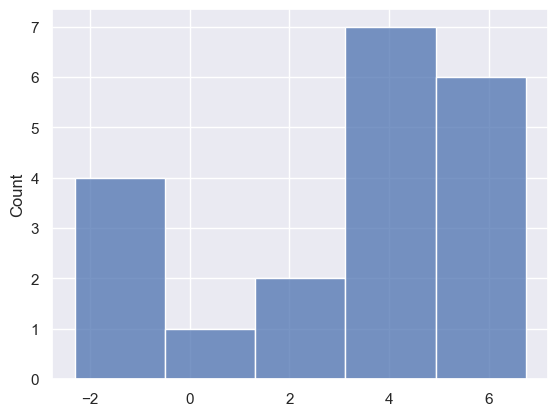

In [10]:
hist = sns.histplot(data=x, bins=5, kde=False)

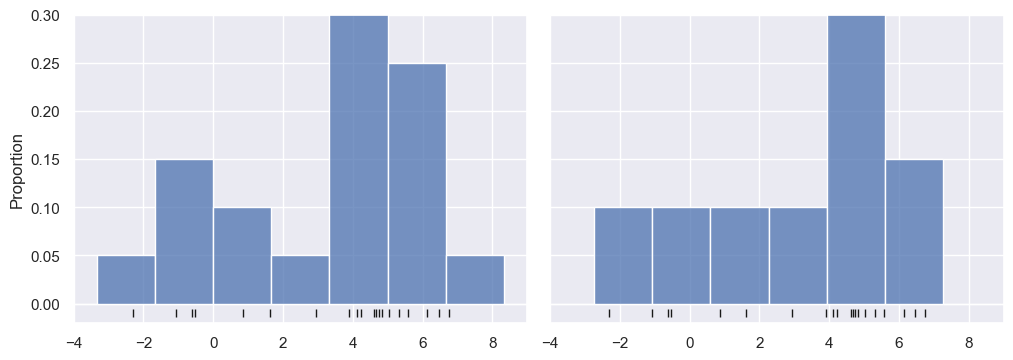

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
bins = np.linspace(-5, 10, 10)
for i, offset in enumerate([0.0, 0.6]):
    # create histograms using specific bin ranges
    sns.histplot(x, bins=bins + offset, kde=False, stat="proportion", ax=ax[i])
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

Слева гистограмма ясно показывает, что это бимодальное распределение. Справа мы видим унимодальное распределение с длинным хвостом. Не зная о манипуляции с бинами, вы, вероятно, не догадались бы, что эти две гистограммы были построены на основе одних и тех же данных: учитывая это, как можно доверять интуиции, которую дают гистограммы? И как мы можем это улучшить?

Рассмотрим гистограмму как набор кубиков, где каждый кубик, представляющий значение в заданном ренже, ставится в стек поверх тех, которые уже туда попали.  

(-0.2, 8.0)

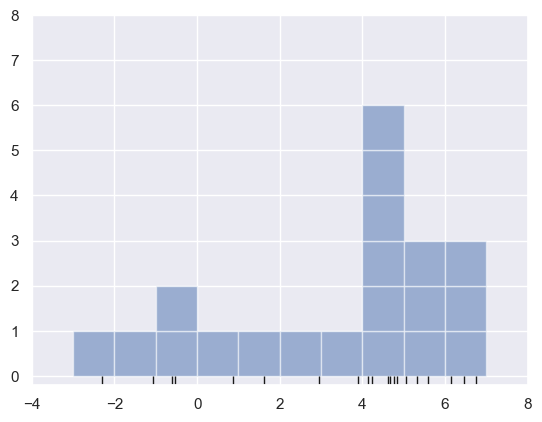

In [14]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',
        markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,
                                   alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

Проблема с нашими двумя гистограммами связана с тем, что высота стека часто отражает не фактическую плотность соседних точек, а то, как бины выравниваются с данными. Это несовпадение между значениями и соответствующими блоками является потенциальной причиной плохих результатов интерпретации гистограммы, наблюдаемых здесь. Но что, если вместо того, чтобы складывать блоки, выровненные по ячейкам, мы должны были складывать блоки, выровненные по точкам, которые они представляют? Если мы это сделаем, блоки не будут выровнены, но мы сможем сложить их вклады в каждом месте вдоль оси X, чтобы найти результат. Давайте попробуем это:

_Tip:_ Чтобы получить красивую плотность на графике, удобно использовать
`plt.fill_between(x, density, alpha=0.5)`. Эта функция заполняет полигонами области между `y_min` (равен 0 по умолчанию) и `y_max` (density), горизонтальные координаты задаются x.

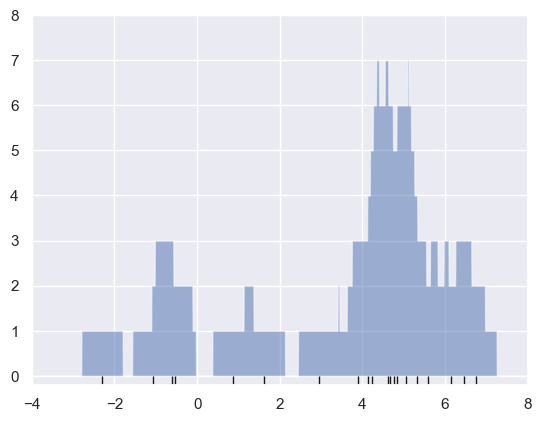

In [21]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

# plot results
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);


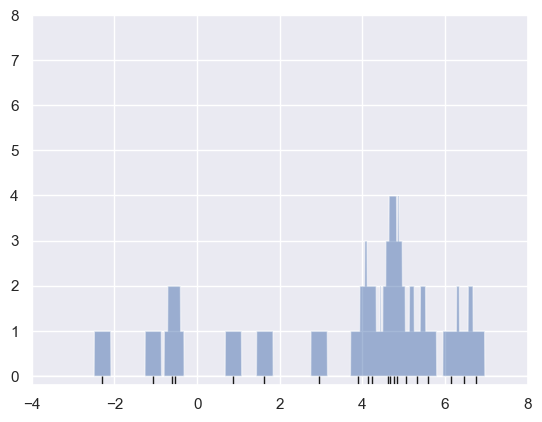

In [19]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.2) for xi in x)

# plot results

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);


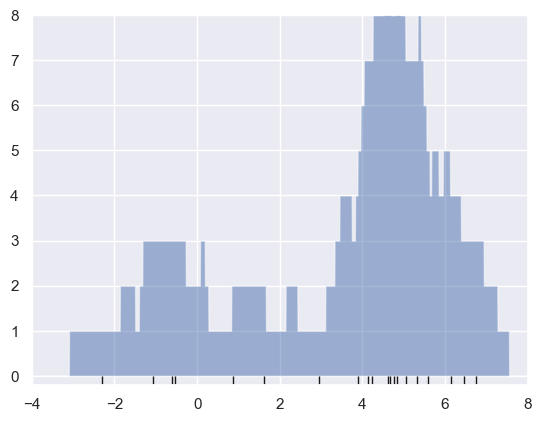

In [20]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.8) for xi in x)

# plot results

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);


Результат гораздо более точно отражает реальные характеристики данных, чем стандартная гистограмма. Однако, чтобы получить более полную информацию о распределении, мы могли бы сгладить неровные края. Например, мы могли бы заменить блоки в каждом месте сглаживающей функцией, например, функцией Гаусса. Давайте использовать стандартную нормальную кривую в каждой точке вместо блока.


In [25]:
from scipy.stats import norm
# define horizontal coordinates - using existing boundaries
x_d = np.linspace(-4, 8, 2000)

Пример:

X value is:  1.6243453636632417


<Axes: >

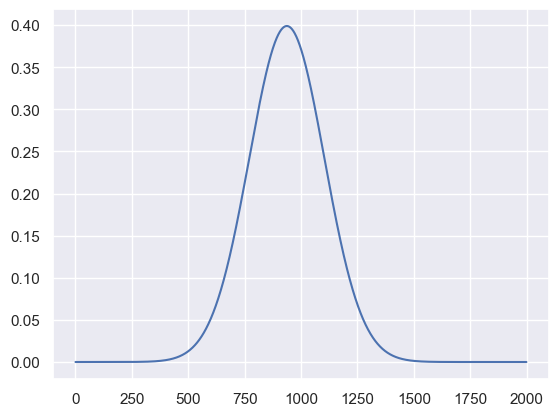

In [28]:
x_0 = x[0]
print("X value is: ", x_0)
# create normal continuos variable with mean in x
# After that get probability density estimation for it
sns.lineplot(norm(x_0).pdf(x_d))
# plot .pdf for that value for x_d

In [29]:
density = sum(norm(xi).pdf(x_d) for xi in x)

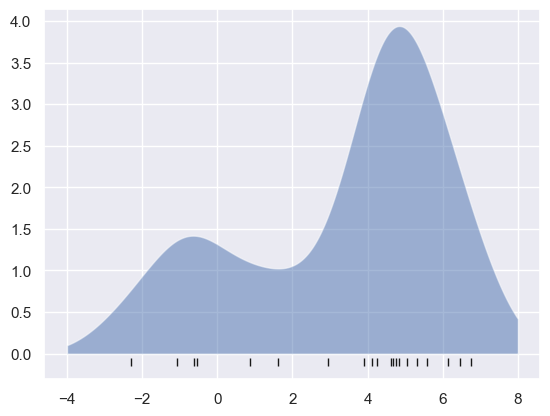

In [30]:
# final density is the sum of all density estimation for every data point
# define new density calculation
plt.fill_between(x_d, density , alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

Эти два последних графика являются примерами ядерной оценки плотности в одном измерении: первый использует так называемое ядро ​​«цилиндр», а второй использует ядро ​​Гаусса.
Параметрами ядерной оценки плотности являются ядро, которое определяет форму распределения, помещенного в каждую точку, и полоса пропускания ядра, которая контролирует размер ядра в каждой точке. На практике существует множество ядер, которые вы можете использовать для оценки плотности ядра: в частности, реализация Scikit-Learn KDE поддерживает одно из шести ядер, о которых вы можете прочитать в [документации](https://http://scikit-learn.org/stable/modules/density.html). Попробуем использовать одно из них

(-0.02, 0.22)

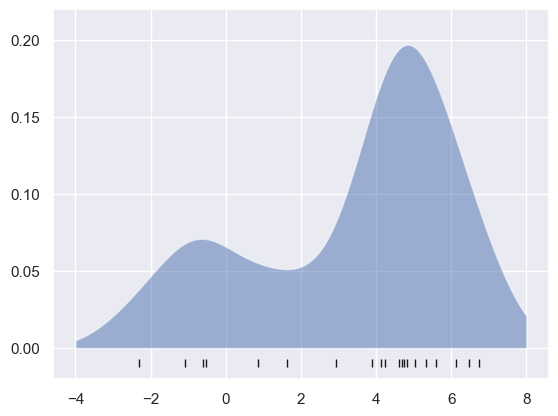

In [32]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

Выбор полосы пропускания в KDE чрезвычайно важен для поиска подходящей оценки плотности - она контролирует компромисс между смещением и дисперсией: слишком узкая полоса пропускания приводит к оценке с высокой дисперсией (т. е. -подгонка), где наличие или отсутствие одной точки имеет большое значение. Слишком широкая полоса пропускания приводит к сильному смещению оценки (т. е. недостаточно хорошему подбору), когда данные размываются широким ядром.

В статистике существует долгая история методов быстрой оценки наилучшей пропускной способности на основе довольно строгих предположений о данных: если вы посмотрите реализации KDE, например, в пакетах SciPy и StatsModels, вы увидите реализации, основанные на некоторых из этих правил.

Такая настройка гиперпараметров часто выполняется эмпирически с помощью перекрестной проверки. Сделаем это.

In [36]:
from sklearn.model_selection import GridSearchCV
#bandwidths = [10**i for i in range(-1, 1, 0.01)]
# Your code
bandwidths = 10 ** np.linspace(-1, 1, 100)
# set up grid search: select estimator and parameters grid dictionary (par: space)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                     {"bandwidth": bandwidths })
grid.fit(x[:, None])
grid.best_params_

{'bandwidth': 1.291549665014884}

(-0.02, 0.22)

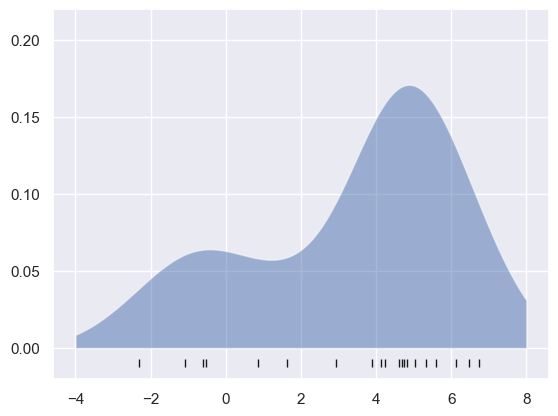

In [37]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.29, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

KDE есть и в стандартных пакетах. Можете поэкспериментировать, чтобы получить близкую оценку.

<Axes: ylabel='Density'>

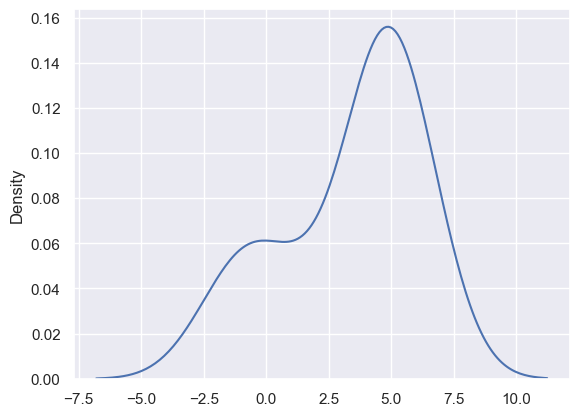

In [38]:
import seaborn as sns
sns.kdeplot(data=x, )

In [41]:
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
                    data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')
                    for d in data.train['species']], dtype='int')

In [ ]:
!pip install basemap

In [42]:
y_min, y_max = data.train['dd lat'].min(), data.train['dd lat'].max()
x_min, x_max = data.train['dd long'].min(), data.train['dd long'].max()

In [44]:
def construct_grids(batch):
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

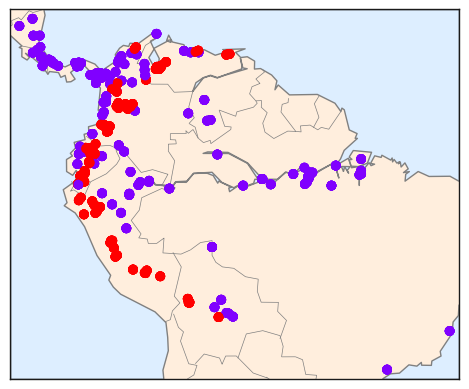

In [45]:
from mpl_toolkits.basemap import Basemap

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=y_min - 1, urcrnrlat=y_max + 1,
            llcrnrlon=x_min -1, urcrnrlon=x_max + 1)
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);

К сожалению, это не дает хорошего представления о плотности вида, поскольку точки ареала вида могут перекрываться.

Давайте воспользуемся ядерной оценкой плотности, чтобы показать это распределение более понятным способом: как плавное указание плотности на карте. Поскольку система координат здесь лежит на сферической поверхности, а не на плоской плоскости, мы будем использовать метрику расстояния haversinus, которая будет правильно представлять расстояния на искривленной поверхности.


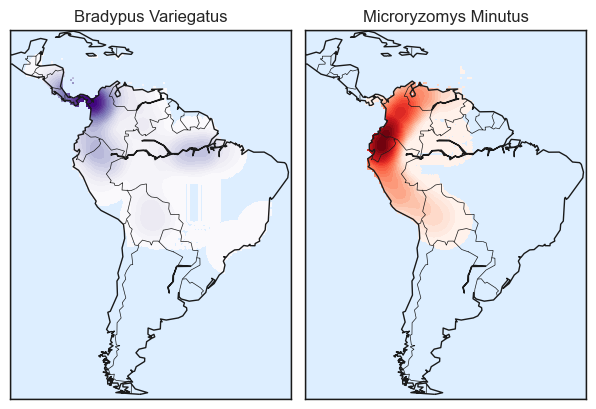

In [54]:
# Set up the data grid for the contour plot

xgrid, ygrid = construct_grids(data)

X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])

land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])

    # plot coastlines with basemap
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()

    # construct a spherical kernel density estimate of the distribution
    # use metric='haversine'
    kde = KernelDensity(bandwidth=0.1, kernel='cosine')
    kde.fit(np.radians(latlon[species==i]))  # 
    # fit kde, don't forget to convert coords to radians

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy)) # exp of kde result
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])